
## 🔹 **1. Giriş: Veri Önişleme Neden Önemlidir?**

### 📌 **1.1 Veri Kalitesi ve Model Başarısı İlişkisi**

Makine öğrenmesi algoritmaları, veriyi doğrudan anlamaz; **veri temsiline** (temiz, anlamlı, uygun formatta) göre çalışır. Kötü verilerle beslenen bir modelden iyi sonuç beklemek hayaldir.

🔍 **Kalitesiz veri = düşük doğruluk, yüksek hata, overfitting/underfitting riski**

---

### 💬 **1.2 Garbage In, Garbage Out (GIGO) İlkesi**

Bu kavram, veri biliminin temel prensiplerinden biridir:

> "Veriye çöp girerse, modelden de çöp çıkar."

🧠 Ne kadar güçlü bir algoritma kullanırsanız kullanın, **gürültülü, eksik veya tutarsız veri** ile eğitilen bir model **anlamlı sonuçlar üretmez**.

---

### 🌍 **1.3 Gerçek Dünya Verilerinin Zorlukları**

Gerçek projelerde veriler genellikle:

* 🧩 Eksik olur (örneğin, anket yanıtları boş kalabilir)
* 🛑 Tutarsızdır (örneğin, “Evet”, “evet”, “EVET”)
* 🤯 Aykırı değerler içerir (örneğin, 120 yaşında birey)
* 🔣 Farklı formatlardadır (tarih/saat, kategorik, metin vs.)
* 💥 Hatalı girişler olabilir (örneğin, maaş yerine "ücretsiz" yazılmış)

---

### 🧩 **Uygulama: Ham Veri Analizi**

Bu adımda verinin genel yapısını anlamaya çalışırız. Aşağıda Seaborn’un `tips` veri seti üzerinden örnek uygulama gösterilmiştir:

```python
import pandas as pd
import seaborn as sns

# Veri setini yükle
df = sns.load_dataset("tips")

# İlk 5 satıra göz atalım
print(df.head())
```

📌 **Yorum:** Bu komut ile verinin sütunlarını, veri tiplerini ve örnek değerleri hızlıca görebiliriz.

---

```python
# Veri yapısı ve türleri
print(df.info())
```

📌 **Yorum:** Burada:

* Toplam kaç satır ve sütun olduğunu,
* Hangi sütunlarda eksik veri olup olmadığını,
* Her sütunun veri türünü öğreniriz.

---

```python
# Sayısal sütunların istatistiksel özeti
print(df.describe())
```

📌 **Yorum:** Bu çıktı ile:

* Ortalama (`mean`)
* Standart sapma (`std`)
* Min–max değerleri
* Çeyrek değerler (`25%`, `50%`, `75%`) görülür.

Bu istatistikler, aykırı değerlerin tespiti ve dağılım analizi için ilk adımdır.

---






In [ ]:
import pandas as pd
import seaborn as sns

# Veri setini yükle
df = sns.load_dataset("tips")



In [ ]:
df.shape

(244, 7)

In [ ]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
# İlk 5 satıra göz atalım
display(df.head())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
display(df.tail())

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


None

In [ ]:
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [ ]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [ ]:

df['sex'].value_counts()


,count
sex,
Male,157
Female,87


In [ ]:
df['total_bill'].mean()


np.float64(19.78594262295082)

In [ ]:
df['tip'].describe()


,tip
count,244.000000
mean,2.998279
std,1.383638
min,1.000000
25%,2.000000
50%,2.900000
75%,3.562500
max,10.000000


In [ ]:
df[df['tip'] == df['tip'].max()]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3



---

## 🔹 2. Eksik Verilerin İşlenmesi

### 📌 **2.1 Eksik Değer Türleri**

Eksik değerler neden oluştuğuna göre 3’e ayrılır:

#### ✅ **MCAR (Missing Completely at Random)**

* Eksik değerler tamamen rastgeledir.
* Örnek: Katılımcı bir soruyu atlamış ama bu davranış hiçbir özelliğe bağlı değil.

#### ✅ **MAR (Missing at Random)**

* Eksiklik başka bir gözlenebilir değişkene bağlıdır.
* Örnek: Genç bireylerin gelir bilgisi eksik olabilir (ya çalışmıyorlar ya da gizlemek istiyorlar).

#### ✅ **MNAR (Missing Not at Random)**

* Eksiklik gözlenemeyen bir nedene bağlıdır.
* Örnek: Geliri çok yüksek olan bireyler özellikle gelir bilgisini paylaşmamış olabilir.

---

### 🧠 **2.2 Silme vs Tamamlama: Hangisini Ne Zaman?**

| Durum                                | Öneri                                    |
| ------------------------------------ | ---------------------------------------- |
| Eksik oranı düşükse (< %5)           | Silme (dropna) uygundur                  |
| Eksiklik rastgele (MCAR) ise         | Silme yapılabilir                        |
| Eksiklik örüntü taşıyorsa (MAR/MNAR) | İleri düzey tamamlama tercih edilir      |
| Sayısal veride                       | Ortanca (median) genelde daha güvenlidir |
| Kategorik veride                     | Mod (en sık değer) veya "Eksik" etiketi  |

---



In [ ]:
### 🧩 **2.3 Uygulama Örneği**

import seaborn as sns
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Veri setini yükle
df = sns.load_dataset("titanic")

# İlk 5 satır
display(df.head())



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Eksik değerlerin genel görünümü
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
df.shape

(891, 15)

In [ ]:
# Her sütun için eksik veri oranı (satır sayısına göre)
missing_ratio = df.isnull().sum() / len(df)

# Yalnızca eksik verisi olan sütunları göster
missing_ratio = missing_ratio[missing_ratio > 0]

# Sonuçları yazdır
print(missing_ratio.sort_values(ascending=False))


deck           0.772166
age            0.198653
embarked       0.002245
embark_town    0.002245
dtype: float64


### 📊 **2.4 Eksik Veri Görselleştirme**


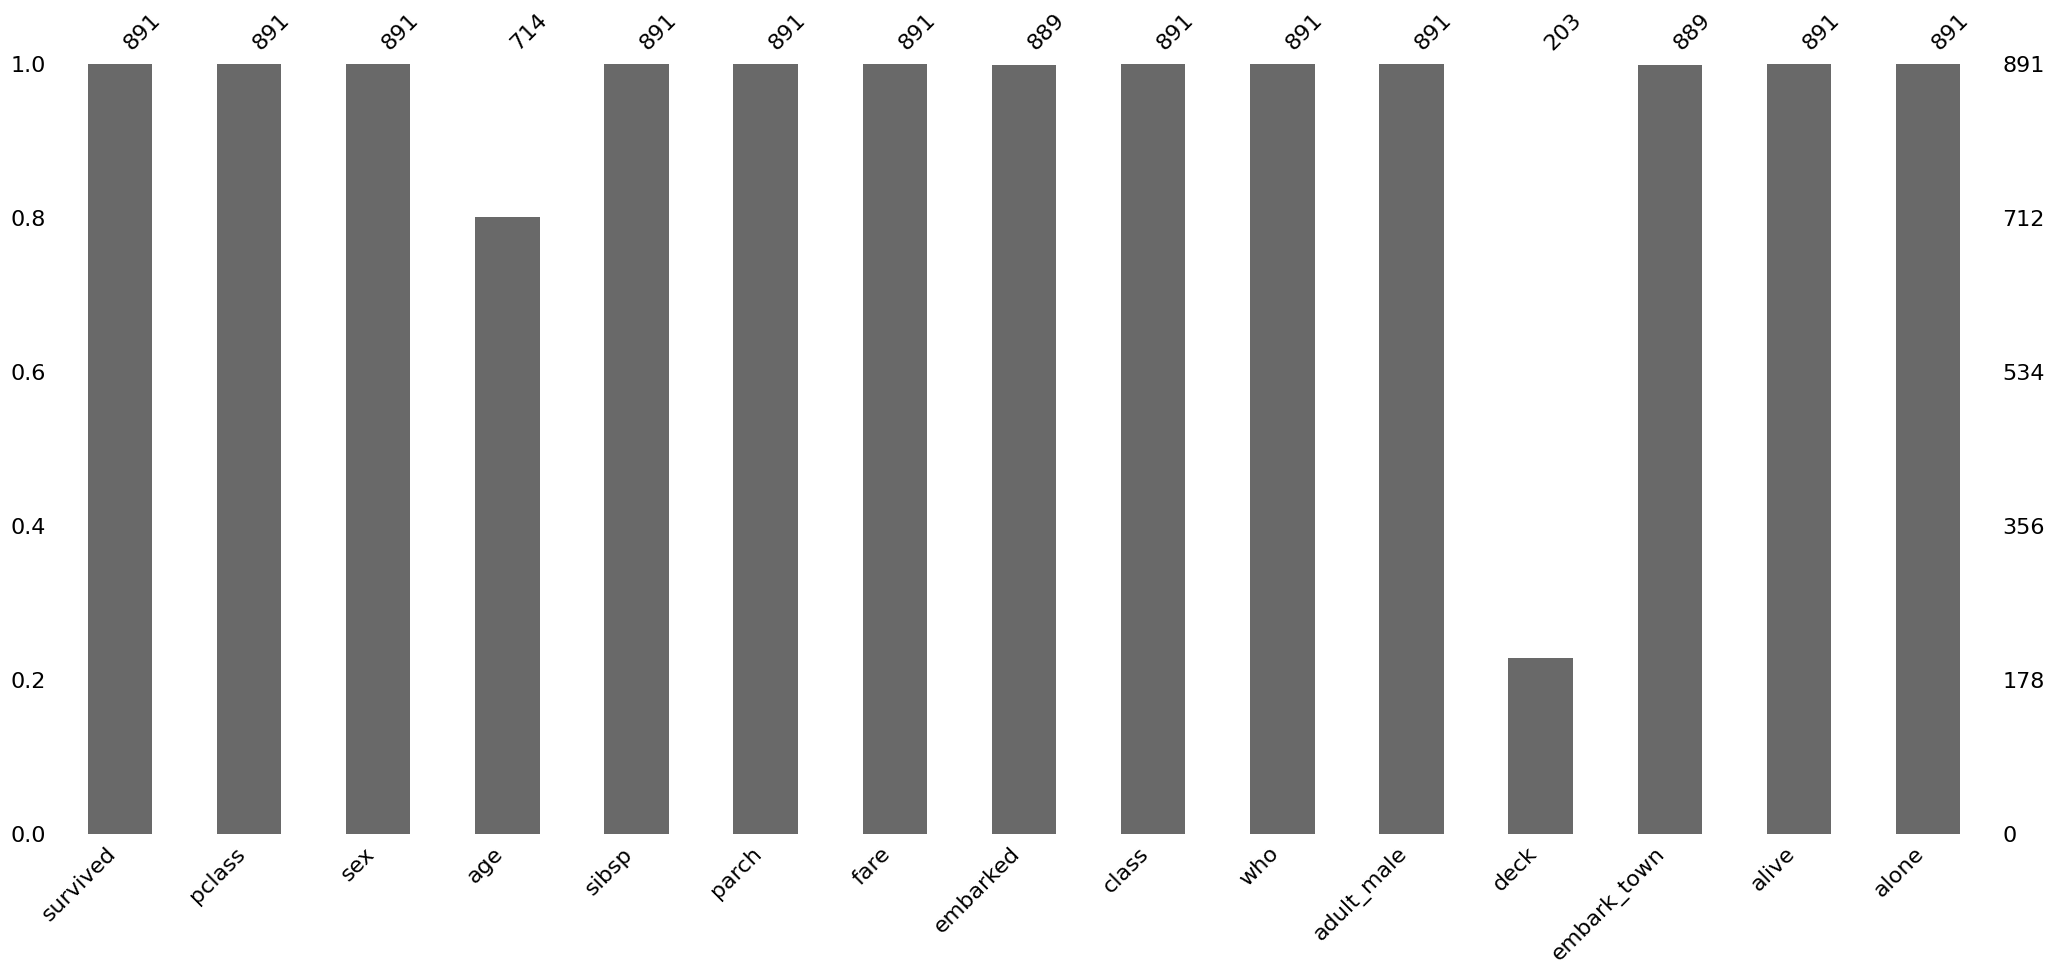

In [ ]:

# missingno ile eksik veri bar grafiği
msno.bar(df)
plt.show()



In [ ]:
### 🔧 **2.5 Eksik Veriyi Silme ve Tamamlama**

#### 🔹 **Silme (dropna)**


df_clean = df.dropna() #satır bazlı siler
print(df_clean.shape)




(182, 15)


In [ ]:
df_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [ ]:
df_clean.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df.shape

(891, 14)

In [ ]:
# deck sütununu kalıcı olarak sil
df.drop(columns='deck', inplace=True) #kolon bazlı kalıcı silme yapar

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [ ]:
#### 🔹 **Basit Tamamlama (fillna)**
# Sayısal sütun - Ortanca ile doldurma
df['age'] = df['age'].fillna(df['age'].median())




In [ ]:
# Kategorik sütun - En sık değerle doldurma
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [ ]:
columns_to_drop = ['class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']

In [ ]:
df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
### 🔧 **2.6 Gelişmiş Tamamlama: SimpleImputer ve KNNImputer**

from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np

# SimpleImputer ile ortalama doldurma
imp_mean = SimpleImputer(strategy="mean")
df['age'] = imp_mean.fit_transform(df[['age']])




In [ ]:
# KNNImputer ile benzer değerlere göre doldurma
knn_imputer = KNNImputer(n_neighbors=5)
df[['age', 'fare']] = knn_imputer.fit_transform(df[['age', 'fare']])



## 🧠 **SimpleImputer ve KNNImputer Farkı Nedir?**

### 🔹 `SimpleImputer(strategy="mean")`

* **Ne yapar?** Eksik değerleri **sütunun ortalaması** ile doldurur.
* **Avantajı:** Hızlı ve basit.
* **Dezavantajı:** Tüm eksik değerlere aynı değeri verir; veri varyansını azaltabilir.
* **Ne zaman kullanılır?** Veriler normal dağılıma sahipse veya eksik oran düşükse uygundur.

---

### 🔹 `KNNImputer(n_neighbors=5)`

* **Ne yapar?** Eksik değerleri, **en yakın 5 komşunun değer ortalamasına göre** doldurur.
* **Nasıl?** Diğer sütunlardaki benzer örnekleri (komşuları) bulur ve eksik değeri o komşuların verilerine göre tahmin eder.
* **Avantajı:** Daha **bağlamsal ve uyarlanabilir** bir tahmin sunar.
* **Dezavantajı:** Yavaş çalışır, ölçekleme gerekebilir.
* **Ne zaman kullanılır?** Özellikle sayısal, birbirine bağlı sütunlar varsa uygundur.

---

## 🧩 **Kod Açıklaması:**

```python
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np
```

🔹 Gerekli sınıflar import edildi.

---

### 🧮 1. SimpleImputer ile Ortalama Doldurma

```python
imp_mean = SimpleImputer(strategy="mean")
df['age'] = imp_mean.fit_transform(df[['age']])
```

✅ **Ne olur?**

* `age` sütunundaki tüm `NaN` değerler, sütunun **ortalama yaşı** ile doldurulur.
* `df[['age']]` → 2D bir DataFrame olarak verilir (`fit_transform` 2D ister).
* Sonuç yeniden `df['age']` sütununa atanır.

---

### 🔄 2. KNNImputer ile K-En Yakın Komşuya Göre Doldurma

```python
knn_imputer = KNNImputer(n_neighbors=5)
df[['age', 'fare']] = knn_imputer.fit_transform(df[['age', 'fare']])
```

✅ **Ne olur?**

* `age` ve `fare` sütunları birlikte ele alınır.
* Eğer `age`'de eksik varsa, `fare` sütununa göre benzer kayıtlar (5 komşu) bulunur.
* Komşuların ortalama `age` değeri alınarak eksik değer doldurulur (ve tam tersi `fare` için de geçerli).
* Böylece her sütunun eksikleri **diğer sütunlarla ilişkili şekilde** doldurulmuş olur.

💡 **Not:** KNNImputer genellikle `StandardScaler` ile ölçeklendirilmiş veride daha sağlıklı sonuç verir çünkü öznitelikler farklı ölçeklerdeyse “komşuluk” anlamlı olmaz.

---

## 🧪 Sonuç:

| Özellik        | SimpleImputer | KNNImputer               |
| -------------- | ------------- | ------------------------ |
| Hesaplama      | Hızlı         | Daha yavaş               |
| Varyans        | Azaltabilir   | Koruyabilir              |
| Bağlam         | Göz ardı eder | Bağlamsal çalışır        |
| Uygulama Alanı | Tek sütun     | Çoklu sütun kombinasyonu |





## 🔹 3. Aykırı Değer Analizi ve İşlenmesi

### 📌 **3.1 Aykırı Değer Nedir? Neden Önemlidir?**

**Aykırı değer**, bir dağılımda diğer gözlemlerden **anlamlı biçimde farklı olan veri noktalarıdır.**
Bu değerler:

* **Veri giriş hatası**, ölçüm hatası olabilir.
* Gerçek ama **uç durumları** temsil ediyor olabilir.
* **İstatistikleri bozar** (ortalama, varyans vb.)
* **Model performansını olumsuz etkileyebilir** (özellikle mesafe temelli modellerde)

---

### 📏 **3.2 Aykırı Değer Tespit Yöntemleri**

#### ✅ **1. Z-Score Yöntemi**

Bir değerin, ortalamadan kaç standart sapma uzakta olduğunu ölçer.

📌 **Formül:**

$$
Z = \frac{(x - \mu)}{\sigma}
$$

* |Z| > 3 → genelde aykırı kabul edilir

#### ✅ **2. IQR (Interquartile Range) Yöntemi**

* **IQR = Q3 – Q1**
* Aykırı değer eşiği:

  * Alt sınır: Q1 – 1.5 × IQR
  * Üst sınır: Q3 + 1.5 × IQR

---

### 🔧 **3.3 Aykırı Değerlerle Başa Çıkma Yöntemleri**

| Yöntem             | Açıklama                                     |
| ------------------ | -------------------------------------------- |
| ❌ **Silme**        | `df[df['x'] < üst_sınır]` gibi filtreleme    |
| 🧼 **Winsorizing** | Aykırıları belirli eşiklere kırpma (max/min) |
| 🔁 **Dönüşüm**     | Log, sqrt gibi işlemlerle etkisini azaltma   |

---

### 🧩 **Uygulama Örneği:**

```python
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Titanic veri setinden sadece sayısal bir sütun
df = sns.load_dataset("titanic")[["age"]]
```

#### 📊 **1. Boxplot ve Histogram ile Görsel Tespit**

```python
sns.boxplot(x=df["age"])
plt.title("Age - Boxplot")
plt.show()

df["age"].hist(bins=30)
plt.title("Age - Histogram")
plt.xlabel("Yaş")
plt.ylabel("Frekans")
plt.show()
```

---

#### 🔍 **2. Z-Score ile Aykırı Değer Etiketleme**

```python
# Z-score hesapla
z_scores = stats.zscore(df["age"].dropna())

# Aykırı değerleri seç (z > 3)
outliers_z = df["age"][np.abs(z_scores) > 3]
print(outliers_z)
```

---

#### 🔍 **3. IQR Yöntemi ile Aykırı Değer Etiketleme**

```python
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerler
outliers_iqr = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]
print(outliers_iqr)
```

---

### ✂️ **Silme ile Temizleme**

```python
# Aykırı olmayanları seç
df_clean = df[(df["age"] >= lower_bound) & (df["age"] <= upper_bound)]
```

---

### 🧼 **Winsorizing (Uç Değer Kırpma)**

```python
df["age_winsorized"] = df["age"].clip(lower=lower_bound, upper=upper_bound)
```

---

### 🔁 **Log Dönüşümü (pozitif verilerde)**

```python
df["age_log"] = np.log1p(df["age"])  # log(1+x) negatif yaşa karşı güvenlidir
```

---



### AYKIRI DEĞERLERE NASIL DAVRANMALIYIM
🔧 Adım 1: Mini veri seti oluştur (8 kişi + 1 CEO)



In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Mini örnek veri seti
data = {
    "monthly_income": [3000, 3500, 4000, 4200, 4500, 4700, 5000, 5200, 30000],  # CEO eklendi
    "age": [25, 30, 32, 34, 36, 38, 40, 42, 55],
    "spending": [3500, 3700, 4000, 4300, 4600, 4700, 5000, 5300, 15000]  # CEO yüksek harcama
}

df = pd.DataFrame(data)



In [ ]:
df.head()

,monthly_income,age,spending
0,3000,25,3500
1,3500,30,3700
2,4000,32,4000
3,4200,34,4300
4,4500,36,4600


In [ ]:
X = df[["monthly_income", "age"]]#bağımsız değişkenler
y = df["spending"]#bağımlı değişken

In [ ]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2_with_outlier = r2_score(y, y_pred)


In [ ]:
df_clean = df[df["monthly_income"] < 10000]  # CEO’yu çıkar

X_clean = df_clean[["monthly_income", "age"]]
y_clean = df_clean["spending"]

model_clean = LinearRegression()
model_clean.fit(X_clean, y_clean)
y_pred_clean = model_clean.predict(X_clean)
r2_without_outlier = r2_score(y_clean, y_pred_clean)


In [ ]:
print(f"R² (aykırı dahil): {r2_with_outlier:.3f}")
print(f"R² (aykırı çıkarıldı): {r2_without_outlier:.3f}")


R² (aykırı dahil): 0.999
R² (aykırı çıkarıldı): 0.972


### UYGULAMA

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Titanic veri setinden sadece sayısal bir sütun
df = sns.load_dataset("titanic")[["age"]]


In [ ]:
df.head()

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [ ]:
df.isnull().sum()

,0
age,0


In [ ]:
#### 🔹 **Basit Tamamlama (fillna)**
# Sayısal sütun - Ortanca ile doldurma
df['age'] = df['age'].fillna(df['age'].median())

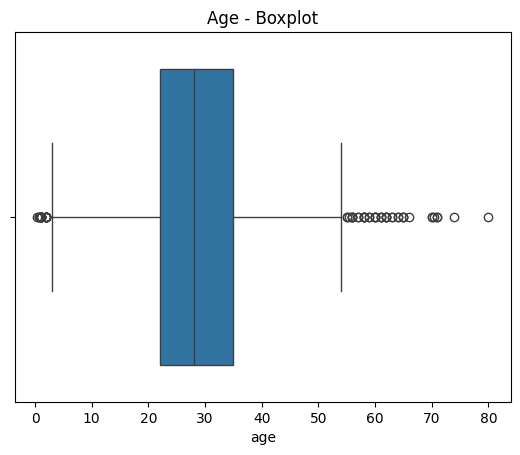

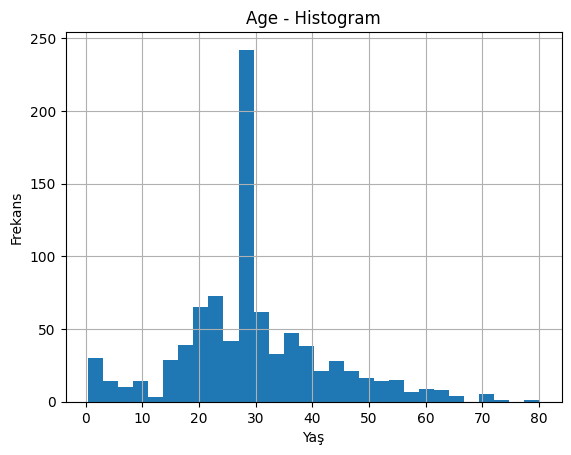

In [ ]:
sns.boxplot(x=df["age"])
plt.title("Age - Boxplot")
plt.show()

df["age"].hist(bins=30)
plt.title("Age - Histogram")
plt.xlabel("Yaş")
plt.ylabel("Frekans")
plt.show()


In [ ]:
# Z-score hesapla
z_scores = stats.zscore(df["age"].dropna())

# Aykırı değerleri seç (z > 3)
outliers_z = df["age"][np.abs(z_scores) > 3]
print(outliers_z)


96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: age, dtype: float64


In [ ]:
Q1 = df["age"].quantile(0.25)
print(Q1)
Q3 = df["age"].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)


22.0
35.0
13.0


In [ ]:
df.describe()

,age
count,891.000000
mean,29.361582
std,13.019697
min,0.420000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


In [ ]:
lower_bound = Q1 - 1.5 * IQR
print(lower_bound)
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)



2.5
54.5


In [ ]:
# Aykırı değerler
outliers_iqr = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]
print(outliers_iqr)

       age
7     2.00
11   58.00
15   55.00
16    2.00
33   66.00
..     ...
827   1.00
829  62.00
831   0.83
851  74.00
879  56.00

[66 rows x 1 columns]


## ✂️ Silme ile Temizleme



In [ ]:
# Aykırı olmayanları seç
df_clean = df[(df["age"] >= lower_bound) & (df["age"] <= upper_bound)]


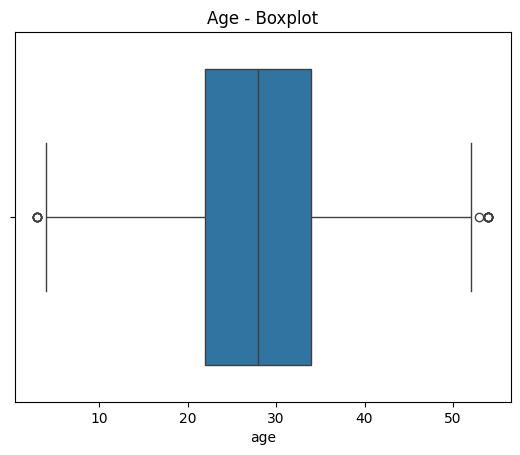

In [ ]:
sns.boxplot(x=df_clean["age"])
plt.title("Age - Boxplot")
plt.show()

## 🧼 Winsorizing (Uç Değer Kırpma)

In [ ]:
df["age_winsorized"] = df["age"].clip(lower=lower_bound, upper=upper_bound)


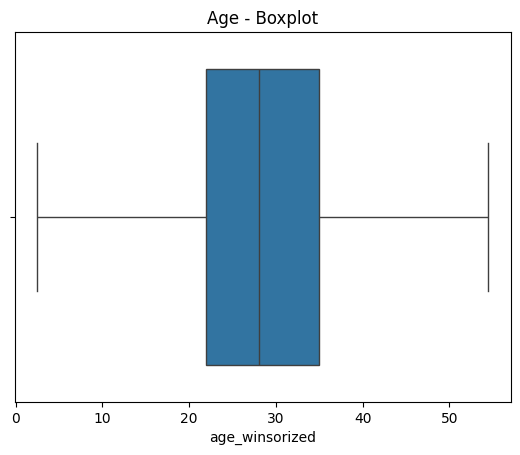

In [ ]:
sns.boxplot(x=df["age_winsorized"])
plt.title("Age - Boxplot")
plt.show()

## 🔁 Log Dönüşümü (pozitif verilerde)

In [ ]:
df["age_log"] = np.log1p(df["age"])  # log(1+x) negatif yaşa karşı güvenlidir


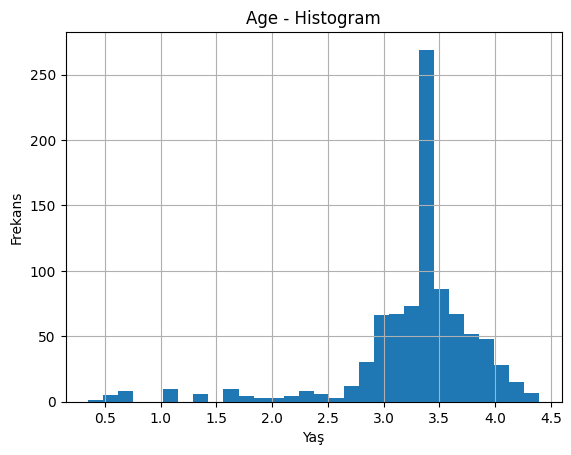

In [ ]:

df["age_log"].hist(bins=30)
plt.title("Age - Histogram")
plt.xlabel("Yaş")
plt.ylabel("Frekans")
plt.show()

## 🔹 1. Logaritmik Dönüşüm Ne Zaman Uygulanmalı?

### 🧭 **Amaç:**

* Aykırı değerlerin etkisini azaltmak
* Sağa çarpık (right-skewed) dağılımları normalize etmek
* Varyansı stabilize etmek
* Lineer modellerde daha güçlü korelasyon elde etmek

### ✅ Uygun durumlar:

| Durum                        | Açıklama                                                             |
| ---------------------------- | -------------------------------------------------------------------- |
| 🔹 Sağ çarpık dağılım        | Örn: Gelir, fatura, fiyat gibi pozitif ama uç değerlere açık veriler |
| 🔹 Büyük değer farkları      | Örn: 10 TL ile 100.000 TL gibi uçurumlar varsa                       |
| 🔹 Aykırı değerler varsa     | Log dönüşümle uç değerlerin etkisi yumuşatılır                       |
| 🔹 Regresyon modelleri       | Hedef değişkenin normal dağılması isteniyorsa, `y`'ye log alınabilir |
| 🔹 Oransal büyüme analizleri | Log kullanmak büyüme oranlarını daha anlaşılır yapar                 |

---

## 🔹 2. **Sadece Hedef Değişkene Uygulanmalı** Demek Doğru mu?

**Yanıt: ❌ Hayır, bu ifade genellenemez.**

### 🔄 Logaritmik dönüşüm **hem bağımsız değişkenlere hem de hedef değişkene** uygulanabilir:

#### 🔸 **Yalnızca hedef değişkene (`y`) uygulanması gereken durumlar:**

* Regresyon modellerinde `y` sağa çarpıksa ve hata terimleri normal dağılmıyorsa
* Örn: Fiyat tahmini (`price`), maaş, büyüme tahmini vb.

```python
y_log = np.log1p(y)
```

#### 🔸 **Bağımsız değişkenlere (`X`) uygulanması gereken durumlar:**

* Modelde `X` sütunları sağ çarpıksa ve outlier etkisi baskılanmak isteniyorsa
* Özellikle mesafe temelli modellerde (KNN, KMeans, SVM), dağılımları normalleştirmek isteniyorsa

```python
df['income_log'] = np.log1p(df['income'])
```

---

## 🧠 **Dikkat Edilmesi Gerekenler:**

* Negatif veya sıfır değerler varsa `np.log1p(x)` (yani log(1 + x)) kullanılmalı.
* Lojistik regresyon gibi sınıflandırma modellerinde hedef sınıf zaten kategoriktir → `log` uygulanmaz.
* Dönüşüm sonrası modelin yorumlanabilirliği değişebilir (logaritmik ölçekte sonuçlar!)

---

### ✅ Özet:

| Soru                                             | Cevap                                                 |
| ------------------------------------------------ | ----------------------------------------------------- |
| Log dönüşüm sadece hedef değişkene mi uygulanır? | ❌ Hayır. Bağımsız değişkenlere de uygulanabilir.      |
| Ne zaman uygulanır?                              | Sağ çarpıklık, aykırılık, varyans dengesizliği varsa. |






## 📉 **Sola Çarpık Dağılımda Logaritmik Dönüşüm Uygulanır mı?**

### ❌ **Hayır.**

Çünkü logaritmik dönüşüm, **sağa çarpık (right-skewed)** veriyi normalleştirmek için kullanılır.
Sola çarpık veriye log uygulamak dağılımı **daha da bozabilir.**

---

### 🔍 Neden?

Log dönüşüm, **büyük değerleri sıkıştırır, küçükleri genişletir.**
Bu da zaten küçük değerlere yığılmış olan **sola çarpık bir dağılımı daha da sıkıştırır.**

---

## 🛠️ **Sola Çarpık Dağılımda Ne Yapılır?**

| Dönüşüm Türü             | Hangi Çarpıklıkta Kullanılır | Açıklama                 |
| ------------------------ | ---------------------------- | ------------------------ |
| `log(x)`                 | Sağ çarpık                   | Büyük değerleri bastırır |
| `sqrt(x)`, `1/x`         | Sağ çarpık                   | Etki benzer              |
| `x**2`, `x**3`, `exp(x)` | **Sola çarpık**              | Küçük değerleri büyütür  |

### ✅ Örnek:

Eğer dağılım şöyleyse:

📊 **Sola çarpık:**
Çoğu değer yüksek, ama bazı **düşük uç** değerler var.
→ `x**2`, `np.exp(x)` gibi **genişletici dönüşümler** tercih edilir.

---

## 🔎 Sola–Sağa Çarpıklık Nasıl Tespit Edilir?

```python
from scipy.stats import skew

print("Çarpıklık (skewness):", df['column'].skew())
```

| Skewness değeri | Yorum       |
| --------------- | ----------- |
| > 0             | Sağ çarpık  |
| < 0             | Sola çarpık |
| ≈ 0             | Simetrik    |

---

## ✅ Özet:

| Dağılım Türü | Dönüşüm Önerisi      |
| ------------ | -------------------- |
| Sağ çarpık   | `log`, `sqrt`, `1/x` |
| Sola çarpık  | `x**2`, `exp(x)`     |
| Simetrik     | Gerek yok            |

---



### çarpıklık katsayısı hesaplama

In [ ]:
from scipy.stats import skew

print("Çarpıklık (skewness):", df['age'].skew())

Çarpıklık (skewness): 0.38910778230082704


### fare sutunu inceleyelim

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

# Titanic veri setini yükle
df = sns.load_dataset("titanic")

# fare sütunundaki eksikleri temizle
fare = df['fare'].dropna()


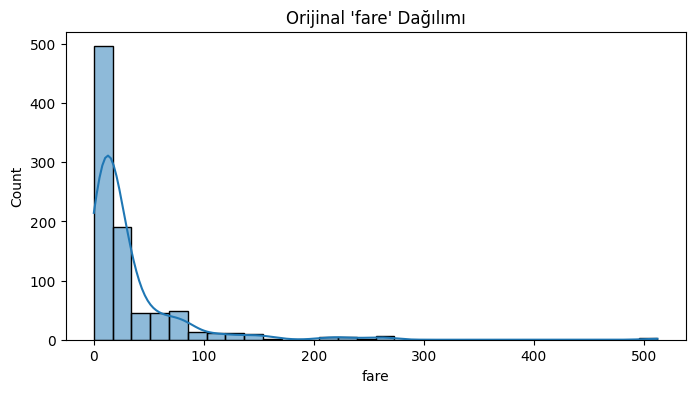

Orijinal çarpıklık (skewness): 4.78


In [ ]:
# Dağılım histogramı
plt.figure(figsize=(8, 4))
sns.histplot(fare, bins=30, kde=True)
plt.title("Orijinal 'fare' Dağılımı")
plt.show()

# Çarpıklık değeri
original_skew = skew(fare)
print(f"Orijinal çarpıklık (skewness): {original_skew:.2f}")


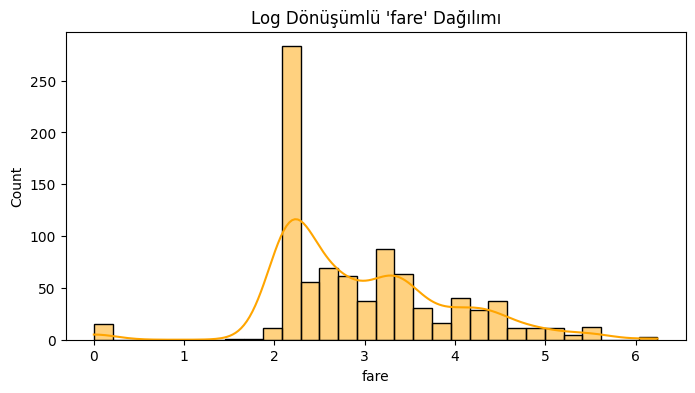

Log dönüşüm sonrası çarpıklık: 0.39


In [ ]:
fare_log = np.log1p(fare)

# Dönüşümlü histogram
plt.figure(figsize=(8, 4))
sns.histplot(fare_log, bins=30, kde=True, color="orange")
plt.title("Log Dönüşümlü 'fare' Dağılımı")
plt.show()

# Yeni çarpıklık değeri
log_skew = skew(fare_log)
print(f"Log dönüşüm sonrası çarpıklık: {log_skew:.2f}")


In [ ]:
df['fare_log'] = np.log1p(df['fare'])



## ✅ **1. Çarpıklık Değeri Yorum Ölçeği (Genel Kural)**

| Skewness (Çarpıklık)         | Yorum                                          |
| ---------------------------- | ---------------------------------------------- |
| -0.5 ile +0.5 arası          | 🔹 *Yaklaşık simetrik (normal dağılıma yakın)* |
| -1 ile -0.5 veya +0.5 ile +1 | ⚠️ *Orta düzey çarpıklık*                      |
| <-1 veya >+1                 | ❗ *Şiddetli çarpıklık*                         |

---

## 📌 **2. Cevap: “0.39 yeterli mi?”**

> **Evet, 4.78'den 0.39’a düşmesi büyük bir iyileşmedir ve genellikle yeterlidir.**

* İlk dağılım **ağır sağ çarpık** idi.
* Dönüşüm sonrası çarpıklık **makul düzeye çekildi** (normal dağılıma yakın).
* Log dönüşüm amacına ulaşmıştır: modeli bozabilecek uç değerlerin etkisi bastırıldı ve dağılım simetrik hale getirildi.

---

## 🧠 **3. Ne zaman başka bir dönüşüm denemeliyim?**

* Eğer **0.5’ten büyük kalıyorsa** ve modelin başarısı hâlâ düşükse, alternatif dönüşümler denenebilir:

  * `sqrt(x)`
  * `1/x` (daha agresif bir bastırma yapar ama dikkatli kullanılmalı)
* Ya da Box-Cox gibi parametrik dönüşümler test edilebilir (pozitif sayılarda).

---

## ✅ Özet:

| Durum                    | Değerlendirme                 |
| ------------------------ | ----------------------------- |
| Çarpıklık önce: 4.78     | Aşırı sağ çarpık ❌            |
| Çarpıklık sonra: 0.39    | Kabul edilebilir ✅            |
| Log dönüşüm başarılı mı? | Evet. Modelde kullanılabilir. |

---




### fare ve age sutunları ile model kurupi log etkisini gözlemleyelim

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Titanic veri setini yükle
df = sns.load_dataset("titanic")[["fare", "age"]].dropna()

# Log dönüşümü
df["fare_log"] = np.log1p(df["fare"])


In [ ]:
X = df[["age"]]  # bağımsız değişken
y = df["fare"]   # hedef

model1 = LinearRegression()
model1.fit(X, y)
y_pred1 = model1.predict(X)

mse1 = mean_squared_error(y, y_pred1)
r2_1 = r2_score(y, y_pred1)

print(f"Orijinal 'fare' ile Model R²: {r2_1:.3f}")
print(f"Orijinal 'fare' ile MSE: {mse1:.2f}")


Orijinal 'fare' ile Model R²: 0.009
Orijinal 'fare' ile MSE: 2770.68


In [ ]:
y_log = df["fare_log"]

model2 = LinearRegression()
model2.fit(X, y_log)
y_pred2 = model2.predict(X)

mse2 = mean_squared_error(y_log, y_pred2)
r2_2 = r2_score(y_log, y_pred2)

print(f"Log Dönüşümlü 'fare_log' ile Model R²: {r2_2:.3f}")
print(f"Log Dönüşümlü 'fare_log' ile MSE: {mse2:.4f}")


Log Dönüşümlü 'fare_log' ile Model R²: 0.014
Log Dönüşümlü 'fare_log' ile MSE: 0.8936


### Veri setindeki tüm sayısal sütunların çarpıklık katsayısını gösterme (tehlikeli olanları)

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Titanic veri setini yükle
df = sns.load_dataset("titanic")



In [ ]:
# Sayısal sütunları seç
numeric_cols = df.select_dtypes(include=["float64", "int64"])

# Her bir sütun için çarpıklık değerini hesapla
skew_values = numeric_cols.apply(lambda x: x.dropna().skew()).sort_values(ascending=False)

# Sadece çarpıklığı 0.5'ten büyük olanlara bakalım
high_skew = skew_values[skew_values > 0.5]

print("Çarpıklığı yüksek olan değişkenler:\n")
print(high_skew)


Çarpıklığı yüksek olan değişkenler:

fare     4.787317
sibsp    3.695352
parch    2.749117
dtype: float64



## 🔹 4. Kategorik Verilerin Kodlanması

### 📌 **Kategorik Değişken Nedir?**

Sayısal olmayan, genellikle **sınıf/etiket** içeren veriler: örneğin cinsiyet, şehir, kategori, renk...

> Bu tür veriler makine öğrenmesi algoritmaları tarafından doğrudan kullanılamaz. Sayıya çevrilmeleri gerekir.

---

## 🧩 **Kodlama Yöntemleri ve Kullanım Alanları**

---

### 🔸 1. **Label Encoding**

Her kategoriye **benzersiz bir tamsayı** atanır.

```python
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex_label'] = le.fit_transform(df['sex'])
```

| `sex`  | `sex_label` |
| ------ | ----------- |
| male   | 1           |
| female | 0           |

⚠️ **Dikkat:** Kategoriler arasında **doğal bir sıralama yoksa**, sayısal değer **yanıltıcı ilişki** kurabilir → Karar ağaçları için uygundur ama lineer modellerde dikkatli olunmalıdır.

---

### 🔸 2. **One-Hot Encoding**

Her kategori için ayrı sütun açılır, ait olduğu sütunda **1**, diğerlerinde **0** yazılır.

```python
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)
```

| embarked | embarked\_Q | embarked\_S |
| -------- | ----------- | ----------- |
| C        | 0           | 0           |
| Q        | 1           | 0           |
| S        | 0           | 1           |

🔹 `drop_first=True` kullanarak multicollinearity riski azaltılır (özellikle lineer modeller için).

---

### 🔸 3. **Binary Encoding** (CategoryEncoders ile)

Etiketler önce `Label Encoding`, sonra **ikilik sistemde** (binary) gösterilir.
→ Özellikle **yüksek cardinality** (çok kategorili) değişkenlerde daha verimli.

```python
import category_encoders as ce

binary_encoder = ce.BinaryEncoder(cols=['deck'])
df_binary = binary_encoder.fit_transform(df)
```

✅ Avantaj: One-hot kadar sütun patlaması (dimensionality explosion) yapmaz.

---

### 🔸 4. **Target Encoding** (Mean Encoding)

Her kategori, hedef değişkenin ortalama değeri ile temsil edilir.

```python
# Örnek: embarked sütunu ile fare ilişkili olsun
df['embarked_target'] = df.groupby('embarked')['fare'].transform('mean')
```

| embarked | embarked\_target |
| -------- | ---------------- |
| C        | 59.95            |
| Q        | 13.21            |
| S        | 27.23            |

⚠️ **Dikkat:**

* Bu yöntem **leakage** riski taşır (modelin hedefe dair bilgi sızdırması).
* Çözüm: **K-Fold Target Encoding** ya da eğitim/test ayrımına dikkat etmek.

---

## 🔍 **Encoding Yöntemi Seçerken Dikkat Edilecekler**

| Kriter               | Açıklama                                                                         |
| -------------------- | -------------------------------------------------------------------------------- |
| 🔢 **Cardinality**   | Kategori sayısı çoksa, One-Hot yerine Binary veya Target tercih edilebilir       |
| 🤖 **Model tipi**    | Karar ağaçları → Label Encoding çalışır, lineer modeller → One-Hot tercih edilir |
| 🚨 **Leakage riski** | Target Encoding dikkatli uygulanmalıdır, eğitim/test ayrımı şarttır              |

---



## 🧠 Ekstra: Tüm Kategorik Sütunları Otomatik Kodlamak

```python
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
```

---




## 🔹 **5. Özellik Ölçekleme (Feature Scaling)**

### 🎯 **Amaç:**

Özelliklerin farklı ölçeklerde olması, birçok makine öğrenmesi algoritmasının performansını olumsuz etkiler.
Özellikle **mesafe-temelli algoritmalar** (KNN, SVM, PCA, Lojistik Regresyon) için bu adım çok kritiktir.

---

## 📏 **5.1 Neden Ölçekleme Gerekir?**

* Farklı birimlerdeki değişkenler modelde **eşit önem taşısın** diye
* **Gradient descent** gibi optimizasyon süreçlerinin daha hızlı ve doğru çalışması için
* **Mesafe tabanlı** yöntemlerde doğru benzerlik ölçümü yapılması için
* Modele girdi sağlayan değişkenlerin sayısal büyüklüklerinden kaynaklı **yanlılık** oluşmaması için

---

## 🚨 **5.2 DİKKAT: Veri Sızıntısı (Data Leakage) Uyarısı**

Ölçekleme işlemi, **mutlaka eğitim-test ayrımından sonra uygulanmalıdır!**
Yani:

```python
X_train, X_test, y_train, y_test = train_test_split(...)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
```

✅ **Neden?**
Test verisi, modelin hiç “görmediği” bir veri olmalıdır.
Eğer tüm veri setinde `fit()` uygulanırsa, test verisinin ortalaması ve std’si modele sızar → **doğrulama güvenilir olmaz!**

---

## 🔧 **5.3 Yaygın Ölçekleme Yöntemleri**

| Yöntem           | Açıklama                      | Uygun Olduğu Durumlar                    |
| ---------------- | ----------------------------- | ---------------------------------------- |
| `StandardScaler` | Z-score: (x – μ) / σ          | Normal dağılıma yakın veriler            |
| `MinMaxScaler`   | 0–1 aralığına çeker           | Aykırı değer yoksa                       |
| `RobustScaler`   | Medyan ve IQR’a göre ölçekler | Aykırı değer varsa                       |
| `MaxAbsScaler`   | -1 ila +1                     | Yalnızca pozitif-negatif dengeli veriler |
| `Normalizer`     | Her satırı birim vektör yapar | Metin madenciliği, cosine similarity     |

---



## 📌 **5.6 Ölçekleme Seçim Rehberi**

| Algoritma                   | Ölçekleme Gerekli mi? | Önerilen Yöntem   |
| --------------------------- | --------------------- | ----------------- |
| KNN, SVM, PCA               | ✅ Evet                | Standard / Robust |
| Regresyon (Lasso/Ridge)     | ✅ Evet                | StandardScaler    |
| Karar ağaçları, RF, XGBoost | ❌ Gerekli değil       | -                 |
| Naive Bayes, Logistic       | ✅ Evet                | Standard / MinMax |

---






In [ ]:
## 🧪 **5.4 Uygulama Örneği: Titanic – `age` ve `fare`**

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

# Sayısal sütunlar
df_numeric = df[["age", "fare"]].dropna()

# Eğitim/test ayrımı
X_train, X_test = train_test_split(df_numeric, test_size=0.2, random_state=42)

# StandardScaler
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)

# Benzer şekilde MinMax ve Robust uygulanabilir



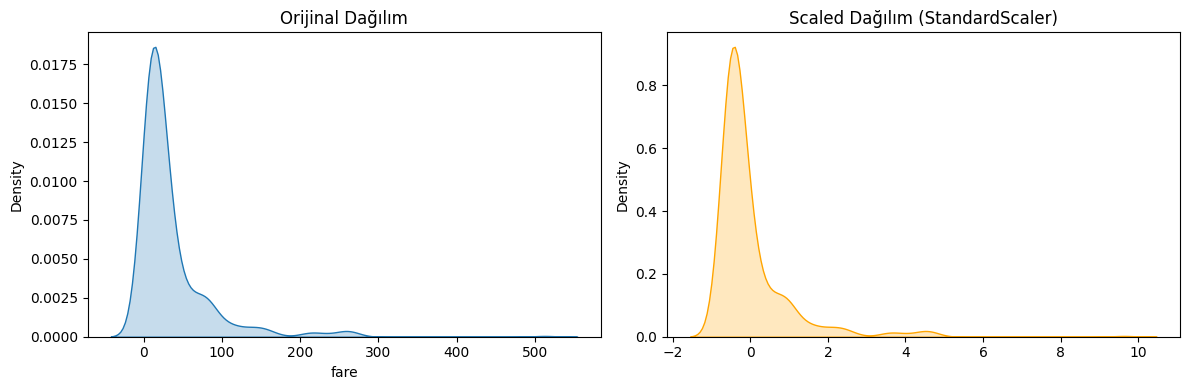

In [ ]:

## 📊 **5.5 Görselleştirme: Öncesi ve Sonrası Karşılaştırması**

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.kdeplot(X_train['fare'], label='Orijinal', fill=True)
plt.title("Orijinal Dağılım")

plt.subplot(1, 2, 2)
sns.kdeplot(X_train_std[:, 1], label='StandardScaler', fill=True, color="orange")
plt.title("Scaled Dağılım (StandardScaler)")

plt.tight_layout()
plt.show()


## 🧭 **Grafik Yorumu**

### 🔹 **Sol Grafik – Orijinal Dağılım (`fare`)**

* Sağ çarpık (right-skewed) bir dağılım görülüyor.
* **Düşük ücretler yoğunlaşmış**, fakat bazı **çok yüksek ücretler** de var → bu da uzun bir sağ kuyruk oluşturmuş.
* Bu tip dağılım, özellikle **KNN, SVM** gibi mesafeye dayalı algoritmalarda problem oluşturabilir çünkü uç değerler modeli domine eder.

---

### 🔹 **Sağ Grafik – StandardScaler ile Ölçeklenmiş Dağılım**

* Veriler Z-score standardizasyonu uygulanarak **ortalama ≈ 0**, **standart sapma ≈ 1** olacak şekilde yeniden ölçeklendirilmiş.
* **Birimler artık anlamsızdır**, sadece değerlerin birbirine olan **göreli uzaklıkları önemlidir.**
* Ancak dikkat: **dağılımın şekli aynı kalmış!**

  * StandardScaler, sadece ölçek değiştirir; **çarpıklığı düzeltmez.**
  * Sağ çarpıklık hâlâ mevcut → dağılım daha “daha dar bir alana sıkışmış” gibi görünse de uç değerler (outliers) hâlâ etkili.

---

## 📌 **Ne Öğrendik?**

| Özellik                  | Orijinal Fare    | Scaled Fare (Z-score) |
| ------------------------ | ---------------- | --------------------- |
| Dağılım Tipi             | Sağ çarpık       | Sağ çarpık (korundu)  |
| Ortalama & Std           | Gerçek değerler  | 0 ve 1’e yakın        |
| Aykırı Değerlerin Etkisi | Yüksek           | Hâlâ var              |
| Yorumlanabilirlik        | Doğal birimlerde | Göreli konumda        |

---

## ✅ **Sonuç:**

* **StandardScaler**, ölçek farklılıklarını düzeltmek için işe yarar.
* Ancak **çarpıklığı düzeltmez.** Eğer bu da isteniyorsa:

  * 🔁 Öncesinde `np.log1p()` gibi bir **log dönüşüm** uygulanmalı,
  * Ardından `StandardScaler` devreye sokulmalı.

---




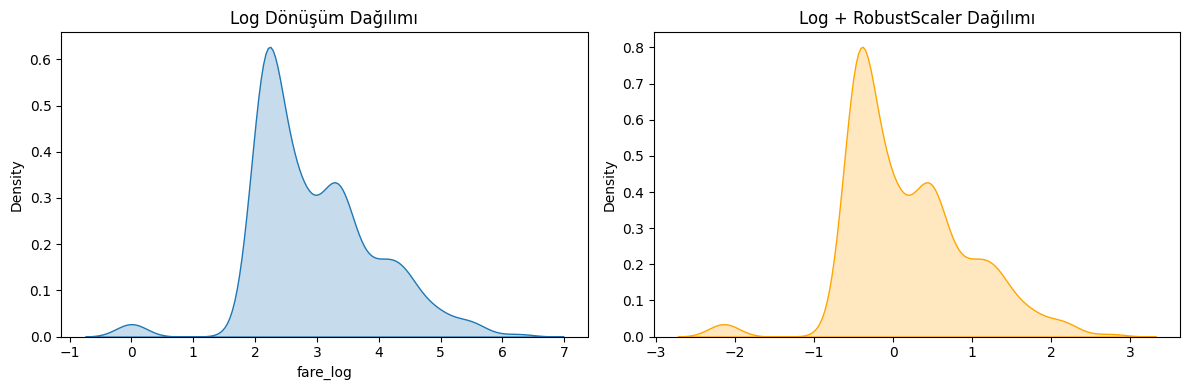

In [ ]:
import numpy as np
from sklearn.preprocessing import RobustScaler

# Log dönüşüm
df["fare_log"] = np.log1p(df["fare"])

# RobustScaler
scaler = RobustScaler()
fare_log_scaled = scaler.fit_transform(df[["fare_log"]])

# Görselleştir
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.kdeplot(x=df["fare_log"], fill=True)
plt.title("Log Dönüşüm Dağılımı")

plt.subplot(1, 2, 2)
sns.kdeplot(x=fare_log_scaled[:, 0], fill=True, color="orange")
plt.title("Log + RobustScaler Dağılımı")

plt.tight_layout()
plt.show()



## ✅ 1. **Log Dönüşüm Ne Yapar?**

* Çarpıklığı azaltır
* Büyük sayıları sıkıştırır (özellikle çok sağ çarpık dağılımlarda)
* Ancak **tam anlamıyla aykırı değerleri ortadan kaldırmaz**, sadece etkilerini azaltır

📌 Yani: **log dönüşüm → şekli düzeltir, uçları bastırır** ama hâlâ outlier'lar olabilir (özellikle log(1000) bile büyüktür).

---

## ✅ 2. **RobustScaler Ne Yapar?**

* Veriyi **medyan** merkezli olarak yeniden ölçekler
* IQR (Q3 - Q1) üzerinden normalleştirme yapar
* Aykırı değerleri **hiçbir zaman ortalama gibi bir referans noktasıyla** değerlendirmez → bu yüzden **sapan değerler modeli bozamaz**

📌 Yani: **RobustScaler → uç değerleri önemsemeyen bir yeniden ölçekleyicidir**

---

## 🧠 3. **Birlikte Kullanmak Mantıklı mı?**

> **Evet, hatta bazı durumlarda çok güçlü bir kombinasyon.**

| Adım           | Amaç                                              |
| -------------- | ------------------------------------------------- |
| `log1p()`      | Dağılımın şeklini düzelt, uç değerleri sıkıştır   |
| `RobustScaler` | Aykırı değerlere karşı duyarsız bir ölçekleme yap |

📌 Özellikle çok **sağ çarpık ve outlier içeren** finansal/gelir/fiyat gibi verilerde bu ikili birlikte çok iyi sonuç verir.

---

## 🧪 Örnek:

* `fare` gibi veri → log ile sıkıştırılır → dağılım biraz düzelir
* ama uçtaki 512 gibi değer hâlâ bir “uçtur”
* `RobustScaler`, artık bu değeri medyan + IQR’a göre değerlendireceği için **gerçekten baskılar**
* `StandardScaler` olsaydı, log'a rağmen yine etkilenirdi

---

## 🔔 Sonuç:

> **Log dönüşüm, aykırıların etkisini azaltır.
> RobustScaler ise, zaten aykırılara karşı hassas olmayan bir ölçekleyici olduğu için bu etkiyi daha da dengeler.**
> Birlikte kullanıldığında, modelin aşırı uçlardan etkilenme riski ciddi biçimde düşer.



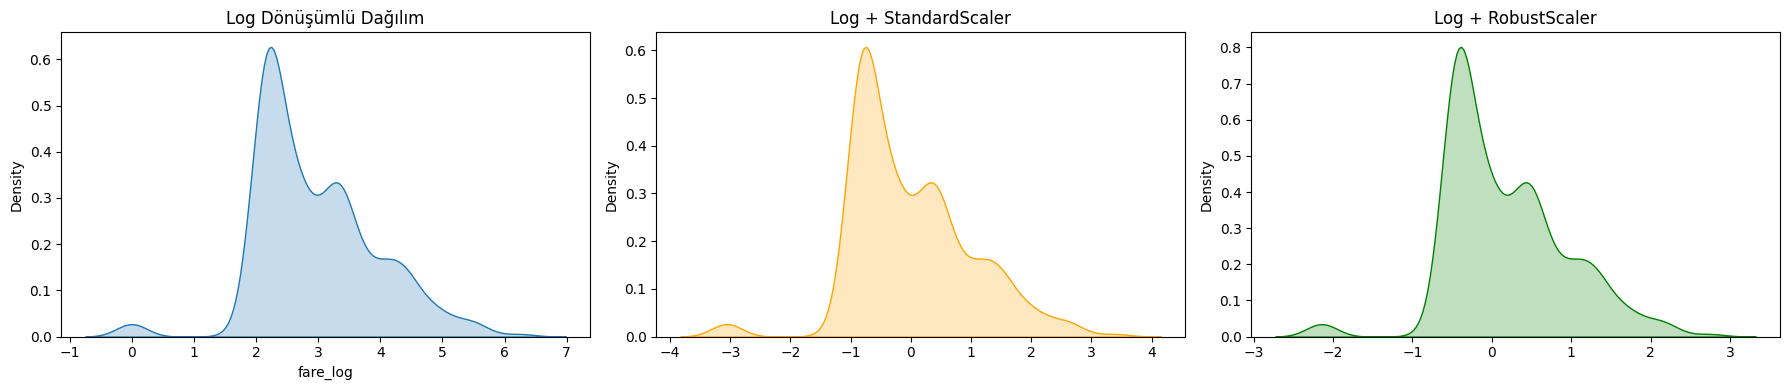

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler

# Titanic veri setini yükle
df = sns.load_dataset("titanic")[["fare"]].dropna()

# 1. Log dönüşüm uygula
df["fare_log"] = np.log1p(df["fare"])

# 2. Ölçekleyicileri tanımla
scaler_standard = StandardScaler()
scaler_robust = RobustScaler()

# 3. Fare_log için ölçekleme uygula
fare_log_std = scaler_standard.fit_transform(df[["fare_log"]])
fare_log_robust = scaler_robust.fit_transform(df[["fare_log"]])

# 4. Görselleştir
plt.figure(figsize=(18, 4))

# Log dönüşümlü orijinal
plt.subplot(1, 3, 1)
sns.kdeplot(x=df["fare_log"], fill=True)
plt.title("Log Dönüşümlü Dağılım")

# StandardScaler sonrası
plt.subplot(1, 3, 2)
sns.kdeplot(x=fare_log_std[:, 0], fill=True, color="orange")
plt.title("Log + StandardScaler")

# RobustScaler sonrası
plt.subplot(1, 3, 3)
sns.kdeplot(x=fare_log_robust[:, 0], fill=True, color="green")
plt.title("Log + RobustScaler")

plt.tight_layout()
plt.show()


### GENEL UYGULAMA

In [ ]:
# 📦 Gerekli kütüphaneler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 🔹 1. Örnek veri seti oluştur
np.random.seed(42)
n = 100
df = pd.DataFrame({
    "age": np.random.randint(18, 70, size=n),
    "gender": np.random.choice(["Male", "Female"], size=n),
    "income": np.random.normal(5000, 1500, size=n),
    "city": np.random.choice(["Ankara", "İstanbul", "İzmir"], size=n),
    "spend_score": np.random.randint(1, 100, size=n),
    "salary": lambda: None  # geçici placeholder,

})
df["salary"] = df["income"] * 1.2 + df["age"] * 50 + np.random.normal(0, 1000, size=n)
# 🔸 2. Eksik değerler ve aykırı değerler ekle
df.loc[np.random.choice(n, 10, replace=False), "income"] = np.nan
df.loc[np.random.choice(n, 8, replace=False), "city"] = np.nan
df.loc[5, "salary"] = 35000  # aykırı
df.loc[10, "income"] = 40000  # aykırı



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          100 non-null    int64  
 1   gender       100 non-null    object 
 2   income       100 non-null    float64
 3   city         100 non-null    object 
 4   spend_score  100 non-null    int64  
 5   salary       100 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ KB


In [ ]:
df.head()

,age,gender,income,city,spend_score,salary
0,56,Male,6443.961935,İzmir,30,9377.238412
1,69,Male,4685.461345,İzmir,19,10642.664236
2,46,Male,3838.935604,Ankara,17,5781.770987
3,32,Male,4460.332782,Ankara,63,8234.319719
4,60,Male,6086.124877,İstanbul,19,10274.928395


In [ ]:
df.describe()

,age,income,spend_score,salary
count,100.000000,90.000000,100.000000,100.000000
mean,43.350000,5443.424188,49.260000,8407.352574
std,14.904663,3963.776104,29.752725,3514.168782
min,19.000000,2090.133172,1.000000,2825.327709
25%,31.750000,3981.818228,23.000000,6793.137619
50%,42.000000,5009.288393,49.000000,8227.735432
75%,57.000000,6262.218626,74.500000,9527.420999
max,69.000000,40000.000000,96.000000,35000.000000


In [ ]:
df.isnull().sum()

,0
age,0
gender,0
income,10
city,8
spend_score,0
salary,0


In [ ]:

# 🔹 3. Eksik değerleri tamamlama
df["income"] = SimpleImputer(strategy="mean").fit_transform(df[["income"]])
df["city"] = SimpleImputer(strategy="most_frequent").fit_transform(df[["city"]]).ravel()





In [ ]:
# Sayısal sütunları seç
numeric_cols = df.select_dtypes(include=["float64", "int64"])

# Her bir sütun için çarpıklık değerini hesapla
skew_values = numeric_cols.apply(lambda x: x.dropna().skew()).sort_values(ascending=False)

# Sadece çarpıklığı 0.5'ten büyük olanlara bakalım
high_skew = skew_values[skew_values > 0.5]

print("Çarpıklığı yüksek olan değişkenler:\n")
print(high_skew)


Çarpıklığı yüksek olan değişkenler:

income    7.976038
salary    4.430781
dtype: float64


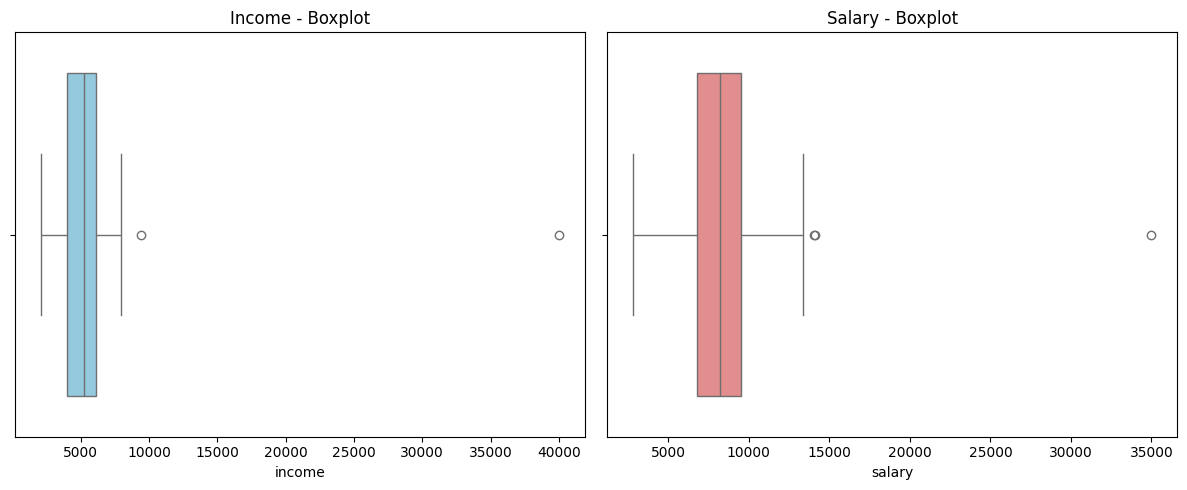

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aykırı değerleri gözlemlemek için boxplot çizimi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["income"], color="skyblue")
plt.title("Income - Boxplot")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["salary"], color="lightcoral")
plt.title("Salary - Boxplot")

plt.tight_layout()
plt.show()


In [ ]:
# 🔹 4. Aykırı değer tespiti ve Winsorizing (IQR yöntemi ile)
def winsorize_iqr(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return df[col].clip(lower, upper)

df["income"] = winsorize_iqr("income")
df["salary"] = winsorize_iqr("salary")


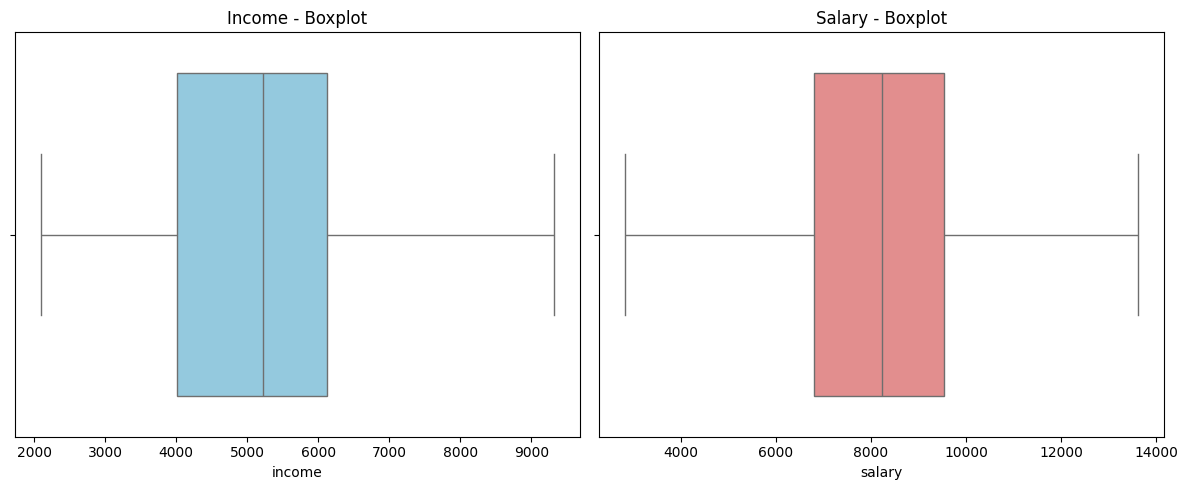

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aykırı değerleri gözlemlemek için boxplot çizimi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["income"], color="skyblue")
plt.title("Income - Boxplot")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["salary"], color="lightcoral")
plt.title("Salary - Boxplot")

plt.tight_layout()
plt.show()


In [ ]:
# Sayısal sütunları seç
numeric_cols = df.select_dtypes(include=["float64", "int64"])

# Her bir sütun için çarpıklık değerini hesapla
skew_values = numeric_cols.apply(lambda x: x.dropna().skew()).sort_values(ascending=False)

# Sadece çarpıklığı 0.5'ten büyük olanlara bakalım
high_skew = skew_values[skew_values > 0.5]

print("Çarpıklığı yüksek olan değişkenler:\n")
print(high_skew)


Çarpıklığı yüksek olan değişkenler:

Series([], dtype: float64)


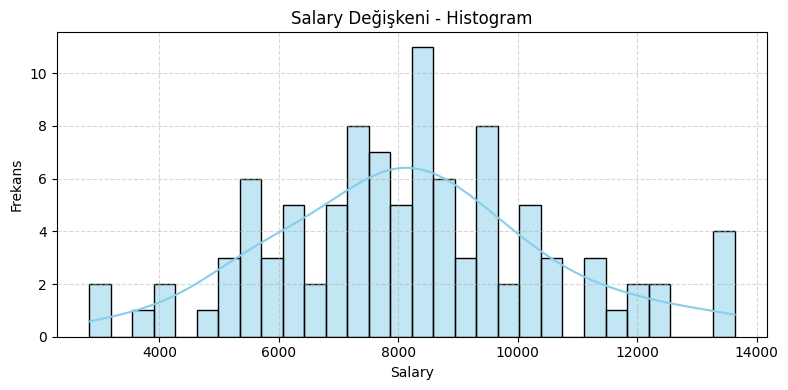

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="salary", bins=30, kde=True, color="skyblue")

plt.title("Salary Değişkeni - Histogram")
plt.xlabel("Salary")
plt.ylabel("Frekans")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# 🔹 5. Kategorik verilerin kodlanması
df["gender"] = LabelEncoder().fit_transform(df["gender"])  # Male:1, Female:0
df = pd.get_dummies(df, columns=["city"], drop_first=True)#one-hote



In [ ]:
df.head()

,age,gender,income,spend_score,salary,city_İstanbul,city_İzmir
0,56,1,6443.961935,30,9377.238412,False,True
1,69,1,4685.461345,19,10642.664236,False,True
2,46,1,3838.935604,17,5781.770987,False,False
3,32,1,4460.332782,63,8234.319719,False,False
4,60,1,6086.124877,19,10274.928395,True,False


In [ ]:
# 🔹 6. Özellik ölçekleme (StandardScaler kullanımı)

#Veri setini eğitim/test olarak ayır

X = df.drop(columns=["salary"])#bağımsız değişkenler salary yok
y = df["salary"] #bağımlı değişkenim salary var
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 7. Sadece sayısal değişkenleri ölçekle
num_cols = ["age", "income", "spend_score"]

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])     # fit + transform
X_test[num_cols] = scaler.transform(X_test[num_cols])           # sadece transform






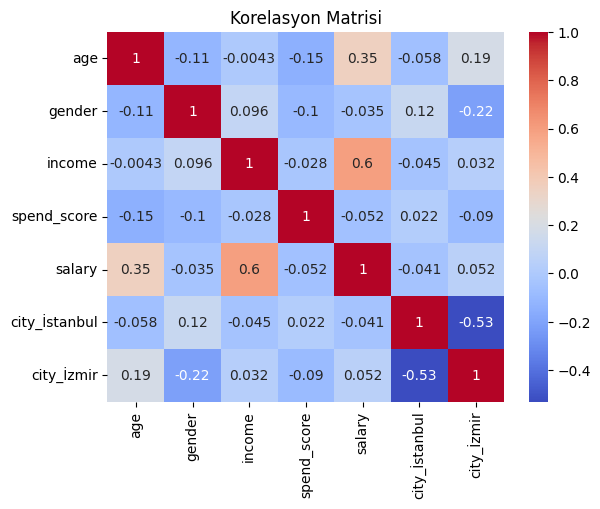

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sadece sayısal değişkenleri korelasyon için kullan
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()


In [ ]:


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))


R²: 0.1321892235912574


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Performans metrikleri
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Sonuçları yazdır
print(f"Model R²: {r2:.3f}")
print(f"Model MSE: {mse:.4f}")



Model R²: 0.130
Model MSE: 5248961.1051


# ÖDEV


---

## 📦 **Ödev Veri Seti: `customer_data`**

```python
import pandas as pd
import numpy as np

np.random.seed(42)
n = 120

df = pd.DataFrame({
    "age": np.random.randint(18, 65, size=n),
    "gender": np.random.choice(["Male", "Female"], size=n),
    "monthly_income": np.random.normal(8000, 2500, size=n),
    "city": np.random.choice(["İstanbul", "Ankara", "İzmir"], size=n),
    "purchase_score": np.random.randint(1, 100, size=n),
})

# eksik değerler ekle
df.loc[np.random.choice(n, 10, replace=False), "monthly_income"] = np.nan
df.loc[np.random.choice(n, 8, replace=False), "city"] = np.nan

# anlamlı target: harcama miktarı
df["spending"] = df["monthly_income"] * 0.8 + df["age"] * 30 + np.random.normal(0, 700, size=n)

# aykırı değer
df.loc[3, "spending"] = 60000
df.loc[10, "monthly_income"] = 50000

df.head()
```

---

## 📘 **Ödev: Veri Önişleme Görevi (10 Adım)**

### 🧹 1. **Eksik Değer Analizi**

* Hangi sütunlarda eksik veri var?
* Her bir sütun için eksik oranı nedir?

### 🧼 2. **Eksik Verilerin Tamamlanması**

* Sayısal değişkenleri `SimpleImputer` ile doldur
* Kategorik değişkenleri en sık kategori ile doldur

### 📊 3. **Aykırı Değer Analizi**

* `spending` ve `monthly_income` değişkenleri için boxplot çiz
* IQR yöntemine göre aykırı değerleri tespit et

### ✂️ 4. **Aykırı Değer İşleme**

* Winsorizing veya clip yöntemiyle aykırıları baskıla

### 🔣 5. **Kategorik Verileri Kodla**

* `gender`: LabelEncoder
* `city`: One-Hot Encoding

### ⚖️ 6. **Sayısal Değişkenleri Ölçekle**

* `StandardScaler` veya `RobustScaler` kullan
* Sadece sayısal sütunları ölçekle

### 📈 7. **Log Dönüşüm Uygula**

* `spending` değişkenine `np.log1p()` uygula
* Dağılımını görselleştir

### 🤖 8. **Model Kur**

* Bağımlı değişken: `spending_log`
* Lineer regresyon modeli kur ve değerlendir (`R²`, `MSE`)

### 📉 9. **Modeli Değerlendir**

* R² değeri ne çıktı? Yorumla.
* Modelin eksik yönlerini düşün

### 💬 10. **Ekstra Bonus: random forest**

* r2 skorun eksik çıktı. üzülme.
* Rondom Forest ile dene

---



## ÇÖZÜME BAŞLA

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 120

df = pd.DataFrame({
    "age": np.random.randint(18, 65, size=n),
    "gender": np.random.choice(["Male", "Female"], size=n),
    "monthly_income": np.random.normal(8000, 2500, size=n),
    "city": np.random.choice(["İstanbul", "Ankara", "İzmir"], size=n),
    "purchase_score": np.random.randint(1, 100, size=n),
})

# eksik değerler ekle
df.loc[np.random.choice(n, 10, replace=False), "monthly_income"] = np.nan
df.loc[np.random.choice(n, 8, replace=False), "city"] = np.nan

# anlamlı target: harcama miktarı
df["spending"] = df["monthly_income"] * 0.8 + df["age"] * 30 + np.random.normal(0, 700, size=n)

# aykırı değer
df.loc[3, "spending"] = 60000
df.loc[10, "monthly_income"] = 50000

df.head()


,age,gender,monthly_income,city,purchase_score,spending
0,56,Female,7839.054873,İstanbul,34,9102.721298
1,46,Female,8862.255838,İstanbul,7,8295.479442
2,32,Male,7799.781662,İstanbul,68,7603.415203
3,60,Male,NaN,İstanbul,58,60000.000000
4,25,Female,11583.788718,İzmir,75,12172.247540
